# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpu = tf.config.list_physical_devices('GPU')
len(gpu)

1

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
data_dir = '/content/drive/MyDrive/data'

In [76]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [77]:
for image_class in os.listdir(data_dir):
  print(image_class)
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

happy
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
happy-people-group-fb.jpg
image13.jpeg
images.jpg
image25.jpeg
1-2.jpg
images18.jpg
image32.png
happy-people21.jpg
happy-people.jpg
getty_152414899_97046097045006_68075.jpg
_happy_jumping_on_beach-40815.jpg
image14.jpeg
Travis-Bradberry-Happy.jpg
image6.jpeg
1902540.jpg
07-120104-happy_people_are_not_nice_people.jpg
images8.jpg
05-12-21-happy-people.jpg
image22.jpeg
maxresdefault.jpg
getty_494581822_130796.jpg
Top-Secrets-of-How-to-be-Happy.jpg
image26.jpeg
o-HAPPY-facebook.jpg
images11.jpg
How-to-Be-Happy_1200x628-facebook.jpg
getty_478389113_970647970450091_99776.jpg
smile.woman_.jpg
image31.jpeg
images9.jpg
images34.jpg
images36.jpg
image12.jpeg
images23.jpg
images5.jpg
8cxKy5g9i.jpg
GettyImages-565706549-949x534.jpg
A_Sep20_14_1189155141.jpg
e162ccda8ce0f197f8863f327add9233.jpg
image18.jpeg
iStock-1212931050.jpg
images13.jpg
images2.jpg
habits-of-happy-people-cr3.jpg
GettyImages-871518740-1024x707.jpg
image29.jpeg
ima

(350, 590, 3)


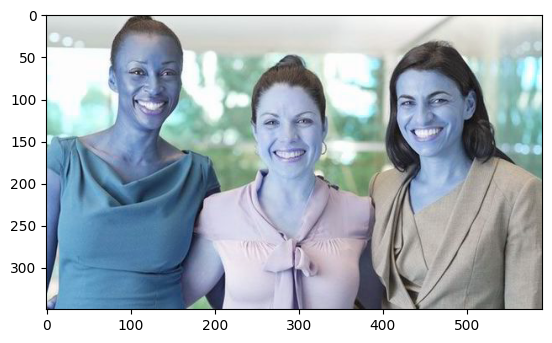

In [11]:
image_path = os.path.join(data_dir, 'happy', '1-2.jpg')

img = cv2.imread(image_path)
print(img.shape)
# height , width and number of channels indicating it is black n white/colored(6)

from matplotlib import pyplot as plt
plt.imshow(img)
# allows u to see full image

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      # Image path obtained for each class in the directory
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Build data pipeline using keras.image_dataset_from_directory api which helps with number of helper utility functions
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')
# load data into batch images while dividing in to 2 parts one is the image path the other is the label represented as 0 , 1 , 2 ...
data

Found 305 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
# In order to access data[0] we r converting it
# Accesssible by looping through it
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()
# Take a bunch of images from accessible data

In [17]:
batch
len(batch)
# Images represented as numpy arrays
batch[0].max()
# batch[0].shape
# Labels
# batch[1]

255.0

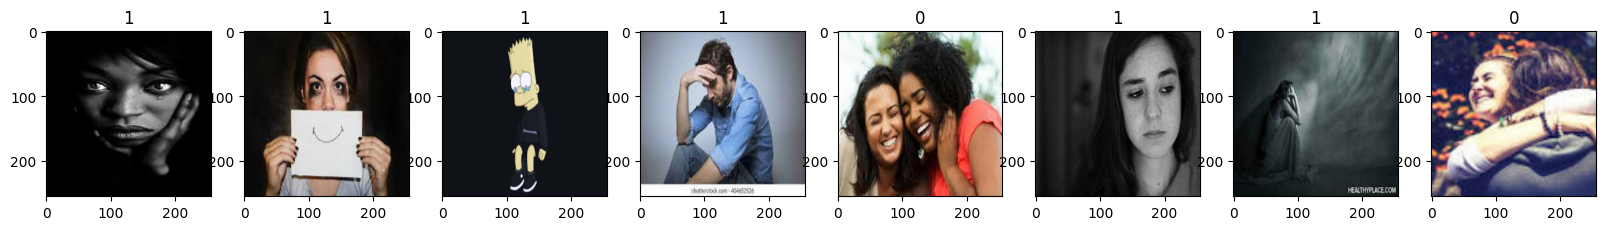

In [18]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
# Now pre processing is scaling data from 1 to 0 to prodcue better results   , generalize faster
# scaling on the fly when data,map is in pipeline , allows transformation in pipiline

# x - images , y - target variable
data = data.map(lambda x,y: (x/255, y))
data
len(data)

10

In [20]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [21]:
# Divide data in to train - 70% , val - 20% , test - 10%
len(data)

10

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
print(train_size)
print(val_size)
print(test_size)
# Each batch has 32 images


7
2
1


# 6. Build Deep Learning Model

---



In [24]:
# get dependecies of sequential api - model building apis , conv2d layer , condesnsing layere goes through your images ,
# fully connected layer analyzing images deep inside

In [25]:
from tensorflow.python import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [119]:
model = Sequential()


In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())



model.add(Flatten())
# These are called fully connected layers
model.add(Dense(256, activation='relu'))
# Final layer will output which class image belongs
model.add(Dense(1, activation='sigmoid'))

In [120]:
# 1 paramter is optimizer , specify the loss , metric to track is accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [121]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [49]:
history = model.fit(train,epochs = 20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 429ms/step - loss: 0.0085 - accuracy: 0.9955 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 5s 453ms/step - loss: 0.0119 - accuracy: 0.9955 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 5s 492ms/step - loss: 0.0073 - accuracy: 0.9955 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 5s 461ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 5s 431ms/step - loss: 0.0241 - accuracy: 0.9955 - val_loss: 0.0294 - val_accuracy: 0.9844
Epoch 6/20
7/7 [==============================] - 5s 420ms/step - loss: 0.0113 - accuracy: 0.9955 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 5s 420ms/step - loss: 0.0112 - accuracy: 0.9955 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

In [50]:
model.fit??


# 8. Plot Performance

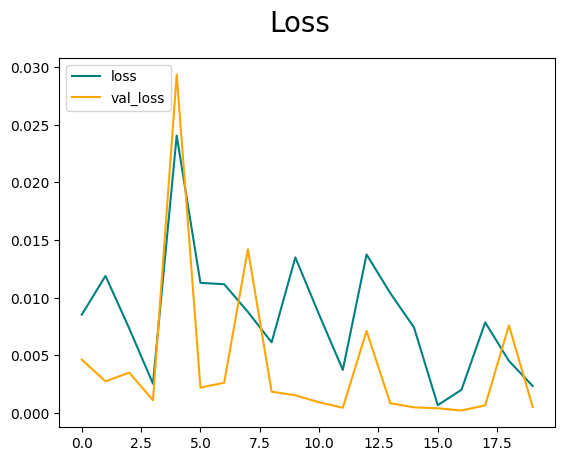

In [91]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

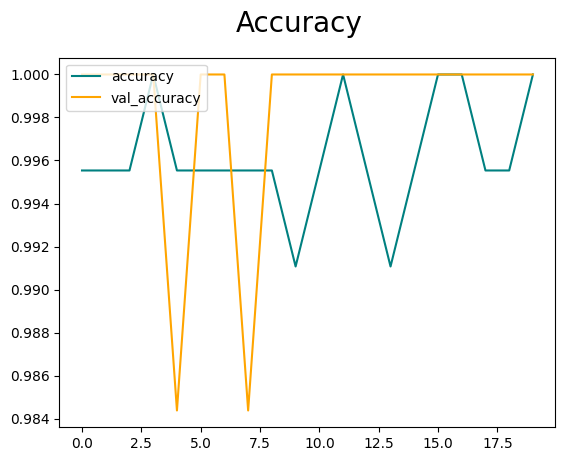

In [92]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [93]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [94]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [95]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 25ms/step


In [96]:
len(test)

1

In [97]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# 10. Test

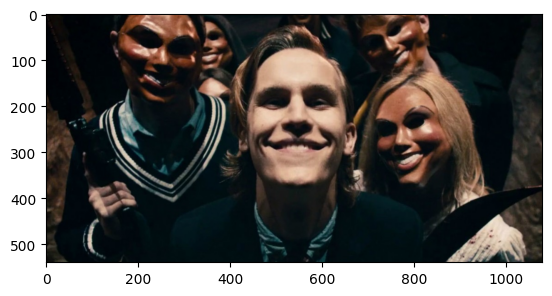

In [122]:
img = cv2.imread('/content/drive/MyDrive/data/happy/07-120104-happy_people_are_not_nice_people.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

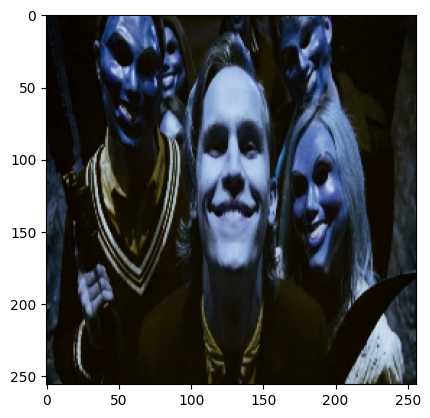

In [125]:
# RESIZE IMAGE BEFORE YOU PASS IT TO NEURAL NETWORK
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
predictions = model.predict(train)

7/7 [==============================] - 2s 39ms/step


In [111]:
predictions

array([[1.0000000e+00],
       [7.4315460e-07],
       [1.7243290e-06],
       [9.9997902e-01],
       [1.0000000e+00],
       [9.9576747e-01],
       [2.5964694e-04],
       [9.9999690e-01],
       [7.5560882e-07],
       [9.9641557e-07],
       [1.0000000e+00],
       [9.9980623e-01],
       [9.9999988e-01],
       [9.9999988e-01],
       [9.9995971e-01],
       [9.9956006e-01],
       [2.5720293e-10],
       [1.0000000e+00],
       [9.9977487e-01],
       [9.9943584e-01],
       [3.4519546e-03],
       [9.9973291e-01],
       [9.9999392e-01],
       [9.9999857e-01],
       [1.9571000e-05],
       [1.7679711e-05],
       [9.9961865e-01],
       [3.6983899e-04],
       [2.8659137e-05],
       [9.9903345e-01],
       [1.0722498e-06],
       [2.3662331e-04],
       [9.9773967e-01],
       [1.0000000e+00],
       [9.2940294e-11],
       [9.9586922e-01],
       [2.9469344e-03],
       [9.9979037e-01],
       [7.9241901e-04],
       [1.0000000e+00],
       [5.8348191e-06],
       [1.139671

In [112]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 17ms/step


In [113]:
yhat

array([[8.8313194e-05]], dtype=float32)

In [114]:
if yhat > 0.9:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models','imageclassifiernewversion.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
new_model = load_model('/content/models/imageclassifiernewversion.h5')

In [118]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 70ms/step


array([[8.8313194e-05]], dtype=float32)